## Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance_data.txt")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.bought_insurance.value_counts()

bought_insurance
1    14
0    13
Name: count, dtype: int64

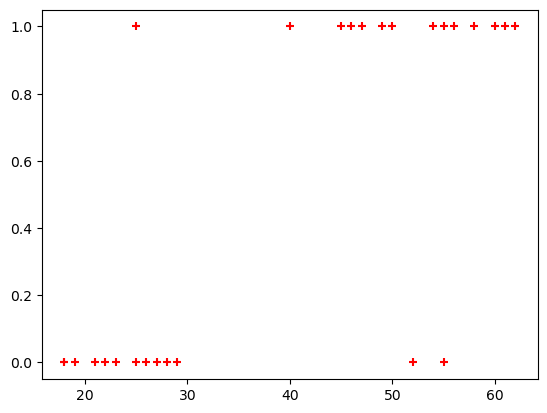

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
X = df.drop('bought_insurance',axis=1)
y = df.drop('age',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1)

In [9]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18
20,21
21,26
4,46


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18
20,21
21,26
4,46


In [13]:
y_predicted = model.predict(X_test)

In [14]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18
20,21
21,26
4,46


In [15]:
model.predict_proba(X_test)

array([[0.06377266, 0.93622734],
       [0.18169672, 0.81830328],
       [0.91937646, 0.08062354],
       [0.1302473 , 0.8697527 ],
       [0.27294717, 0.72705283],
       [0.92858794, 0.07141206],
       [0.89764416, 0.10235584],
       [0.81977914, 0.18022086],
       [0.24768186, 0.75231814]])

In [16]:
y_predicted

array([1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [17]:
y_test.shape

(9, 1)

In [18]:
y_test

,bought_insurance
17,1
14,1
18,0
3,0
23,1
10,0
20,0
21,0
4,1


In [19]:
model.score(X_test,y_test)

0.8888888888888888

In [20]:
y_predicted

array([1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [21]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18
20,21
21,26
4,46


In [22]:
compare = y_test.copy()

In [23]:
compare['Predicted'] = y_predicted

In [24]:
compare

,bought_insurance,Predicted
17,1,1
14,1,1
18,0,0
3,0,1
23,1,1
10,0,0
20,0,0
21,0,0
4,1,1


### Now will use different evaluation matrix to check the performance of the model

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Confusion Matrix

In [26]:
confusion_matrix(y_test,y_predicted)

array([[4, 1],
       [0, 4]], dtype=int64)

In [27]:
cmt = confusion_matrix(y_test,y_predicted,labels = [0,1])
print(cmt)

[[4 1]
 [0 4]]


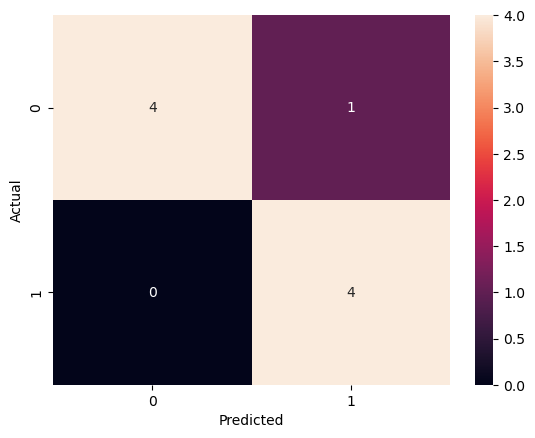

In [28]:
import seaborn as sns
sns.heatmap(cmt,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Classification Report

In [29]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



### An ROC curve is an [Receiver Operating Characteristic] it is a graph showing the performance of a classification model at various threshold value

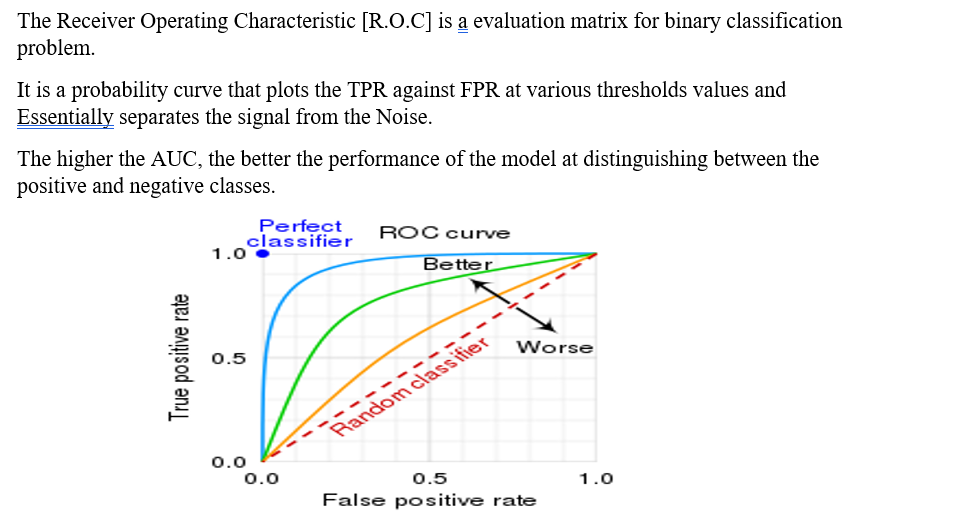

In [30]:
fpr,tpr,thresholds = roc_curve(y_test,y_predicted)  # Calculate ROC curve

In [31]:
roc_auc = auc(fpr,tpr)      # Calculate AUC

In [32]:
print("AUC = ",roc_auc)

AUC =  0.9


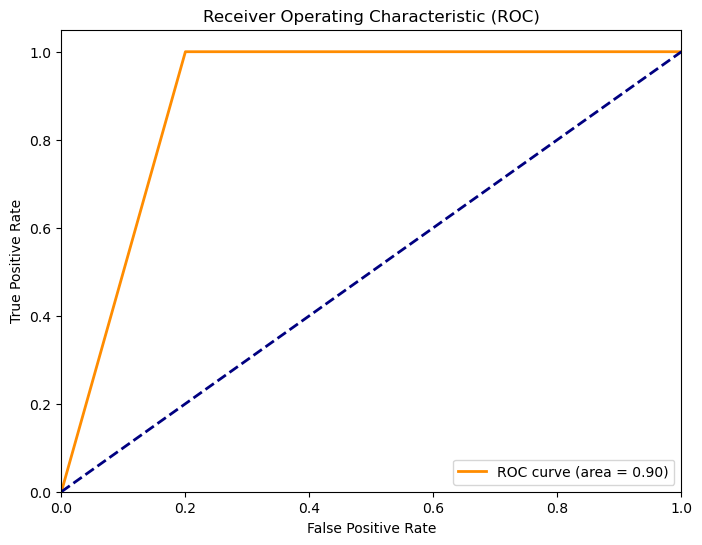

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [34]:
X_test

,age
17,58
14,49
18,19
3,52
23,45
10,18
20,21
21,26
4,46


**model.coef_ indicates value of m in y=m*x + b equation**

In [35]:
model.coef_

array([[0.1312933]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [36]:
model.intercept_

array([-4.92847769])

**Lets defined sigmoid function now and do the math with hand**

In [37]:
import math
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [38]:
def prediction_function(age):
    z = 0.13 * age -4.92 
    y = sigmoid(z)
    return y

In [39]:
age = 35
prediction_function(age)

0.40854102156721994

**We are stating as per the logistic Regression if the person  age is 35 year then the Probability of getting insurance is just 40.85% it is Less than Threshold value. Then it is classified as 0**

In [40]:
age = 43
prediction_function(age)

0.6615031592029523

In [41]:
def predicted_output(x):
    if prediction_function(age)>0.5:
        print("Person is getting insurance")
        return 1
    else:
        print("Person is not getting insurance")
        return 0
        

In [42]:
age = 43
x = prediction_function(age)
predicted_output(x)

Person is getting insurance


1

**We are stating as per the logistic Regression if the person age is 43 year then the Probability of getting insurance is just 66.15% it is Greater than Threshold value. Then it is classified as 1**